# Tutorial on the Visualization of Results

Data visualization is a critical aspect of analyzing and interpreting simulation results. In this notebook, you'll learn how to leverage QuantumDNA's predefined plotting routines to effectively visualize the outcomes of your calculations.

Examples Covered:

* **Visualizing the Eigenspectrum**
Gain insights into the electronic structure by plotting the eigenspectrum of your system. This visualization highlights energy levels and their distributions, essential for analyzing the quantum states of your model.

* **Visualizing the Fourier Analysis**
Explore frequency-domain characteristics using Fourier analysis. This technique is particularly useful for identifying periodicities and resonances in quantum systems.

* **Visualizing Coherences and Populations**
Delve into the dynamics of quantum states by visualizing coherences and populations of the DNA bases or basepairs. These plots reveal how quantum superpositions evolve over time, providing a window into processes such as energy transfer, decoherence, and relaxation.

By the end of this notebook, you’ll have a grasp of how to utilize qDNA's visualization capabilities to analyze and communicate your results effectively.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.png)](https://colab.research.google.com/github/dehe1011/QuantumDNA-notebooks/blob/main/tutorials/4_Visualization.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2

# Save flag: Set to True to enable saving results (currently unused in this script)
save = False

# Verbose flag: Set to True to enable detailed logging
verbose = False

## Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Installation of QuantumDNA
# --------------------------

from importlib.util import find_spec

qDNA_installed = find_spec('qDNA') is not None

if not qDNA_installed:
    %pip install qDNA
    print("Successfully installed the 'qDNA' package.")
else:
    print("Package 'qDNA' is already installed.")

if verbose:
    %pip show qDNA  

from qDNA import *

# ------------------------
# Directory Setup
# ------------------------

import os

# Use the current working directory as the root
ROOT_DIR = os.getcwd()

# Define directory to save figures
SAVE_DIR = os.path.join(DATA_DIR, "my_figures")
os.makedirs(SAVE_DIR, exist_ok=True)

if verbose:
    print(f"Save directory: '{SAVE_DIR}' is ready.")

Package 'qDNA' is already installed.


## Visualization of the Eigenspectrum

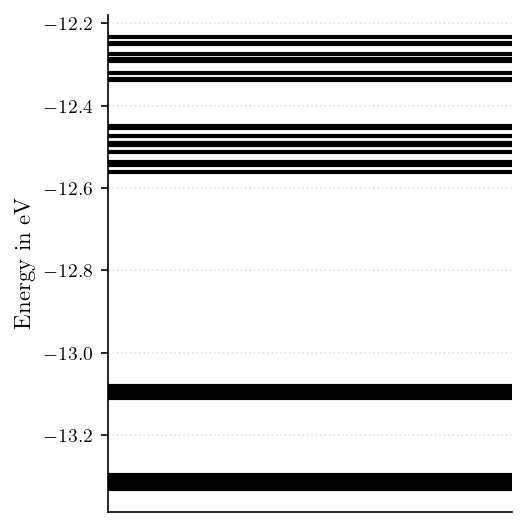

In [3]:
tb_sites = get_tb_sites('GCG')
vis = Visualization(tb_sites, tb_model_name='ELM')
fig, ax = vis.plot_eigv()

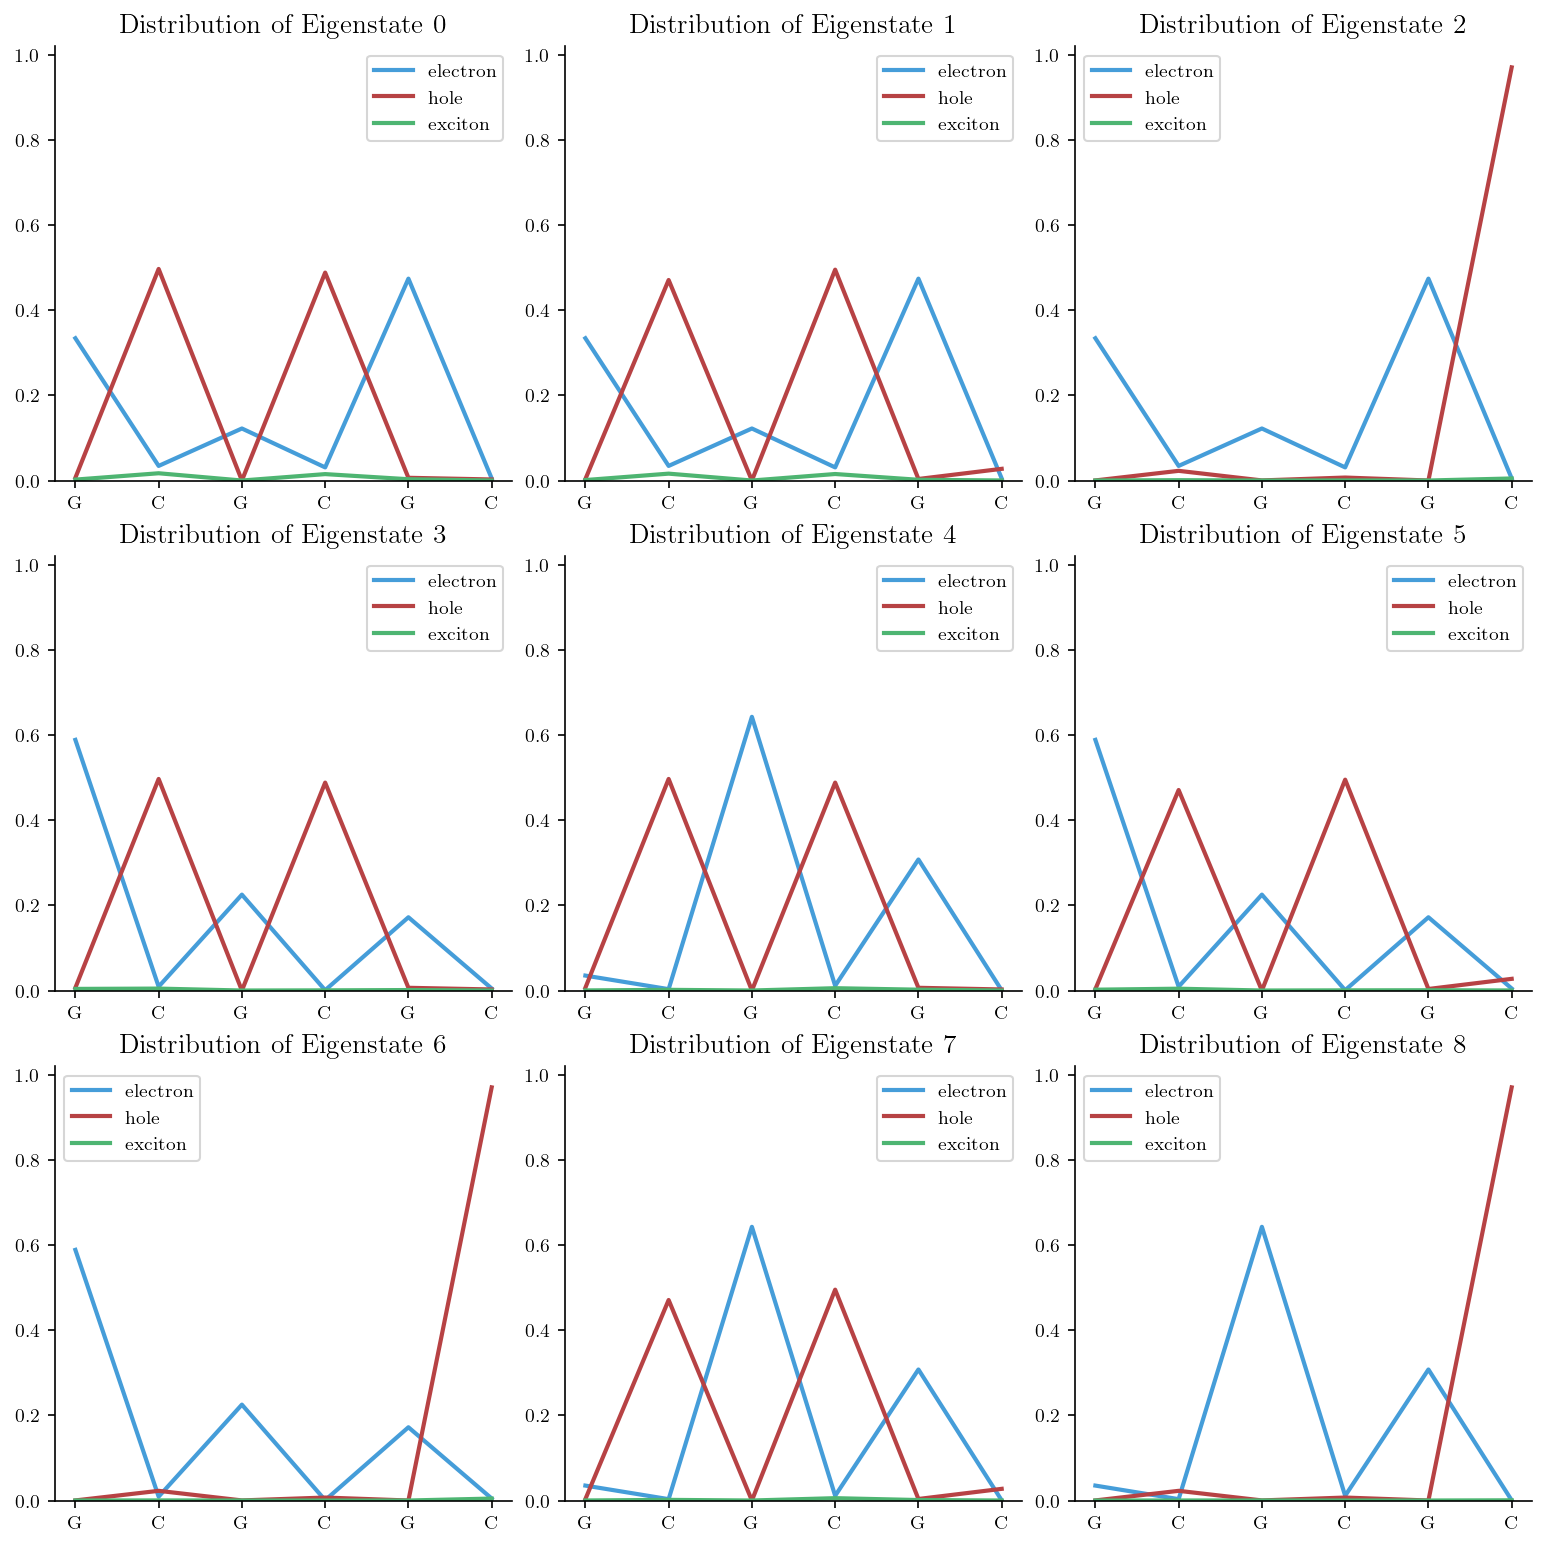

In [4]:
tb_sites = get_tb_sites('GCG')
vis = Visualization(tb_sites, tb_model_name='ELM')

num_rows, num_cols = 3, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(3.4*num_cols, 3.4*num_rows) )
for i, ax in enumerate(axes.flatten()[:num_rows*num_cols]):
    vis.plot_eigs(i, ax=ax, fig=fig)

## Fourier Analysis

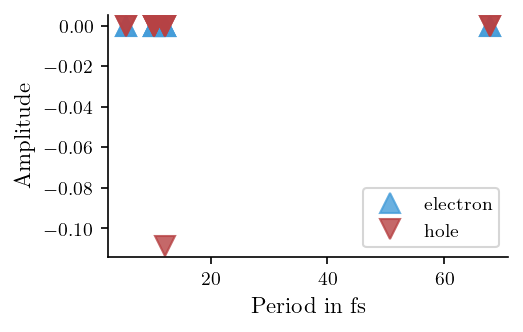

In [5]:
tb_sites = get_tb_sites('GA')
vis = Visualization(tb_sites, particles=['electron', 'hole'], tb_model_name = 'WM')
tb_site = '(0, 1)'
fig, ax = vis.plot_fourier( vis.init_states[0], tb_site, 'period')

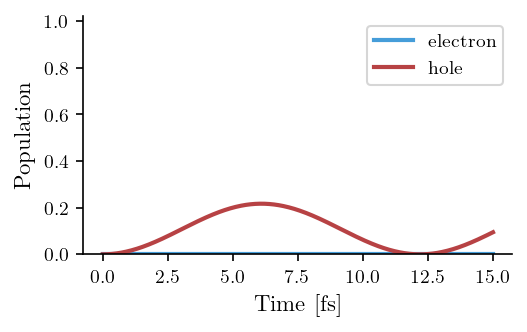

In [16]:
tb_sites = get_tb_sites('GA')
vis = Visualization(tb_sites, particles=['electron', 'hole'], tb_model_name = 'WM', t_end=15, t_unit='fs')
tb_site = '(0, 1)'
fig, ax = vis.plot_pop_fourier(vis.init_states[0], tb_site, vis.times, vis.t_unit)

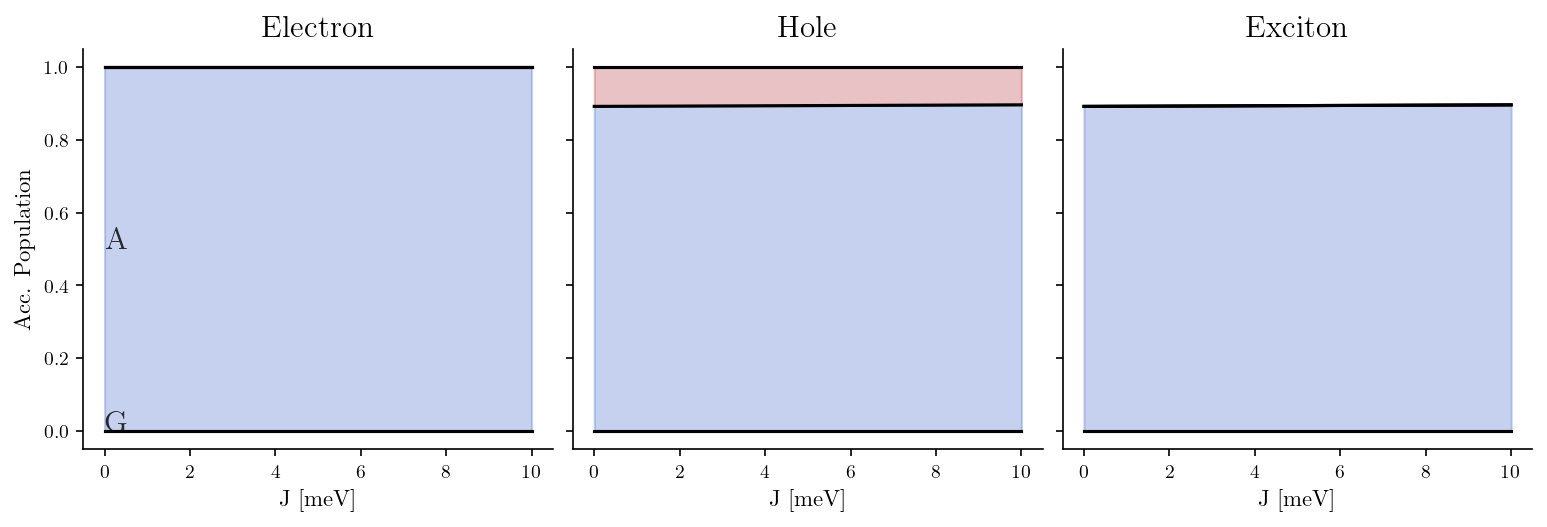

In [23]:
tb_sites = get_tb_sites('GA', tb_model_name='WM')
vis = Visualization(tb_sites, tb_model_name = 'WM')
J_list, J_unit = np.linspace(0,10,100), 'meV'

vis.plot_average_pop(J_list, J_unit=J_unit)

## Visualization of Populations and Coherences

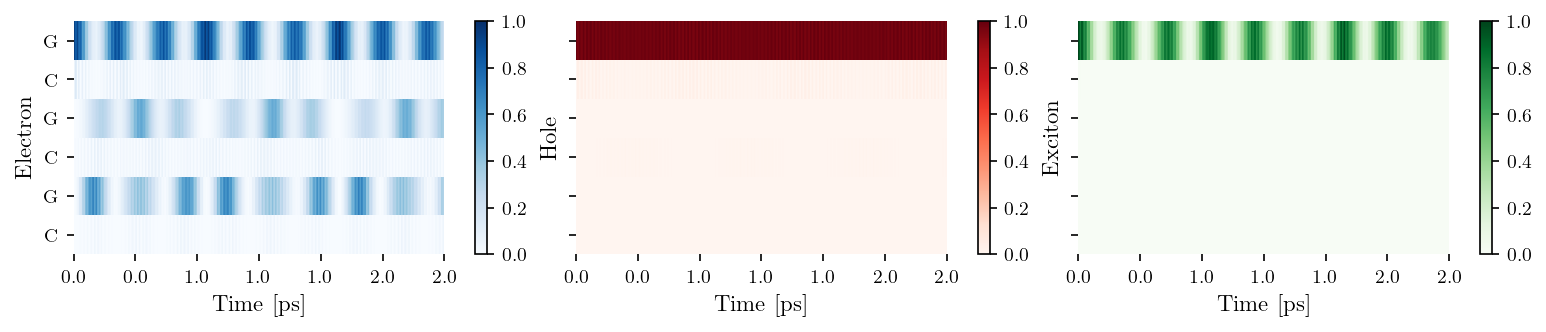

In [25]:
tb_sites = get_tb_sites('GCG')
vis = Visualization(tb_sites, source="Hawke2010", t_end=2)
fig, ax = vis.plot_heatmap()

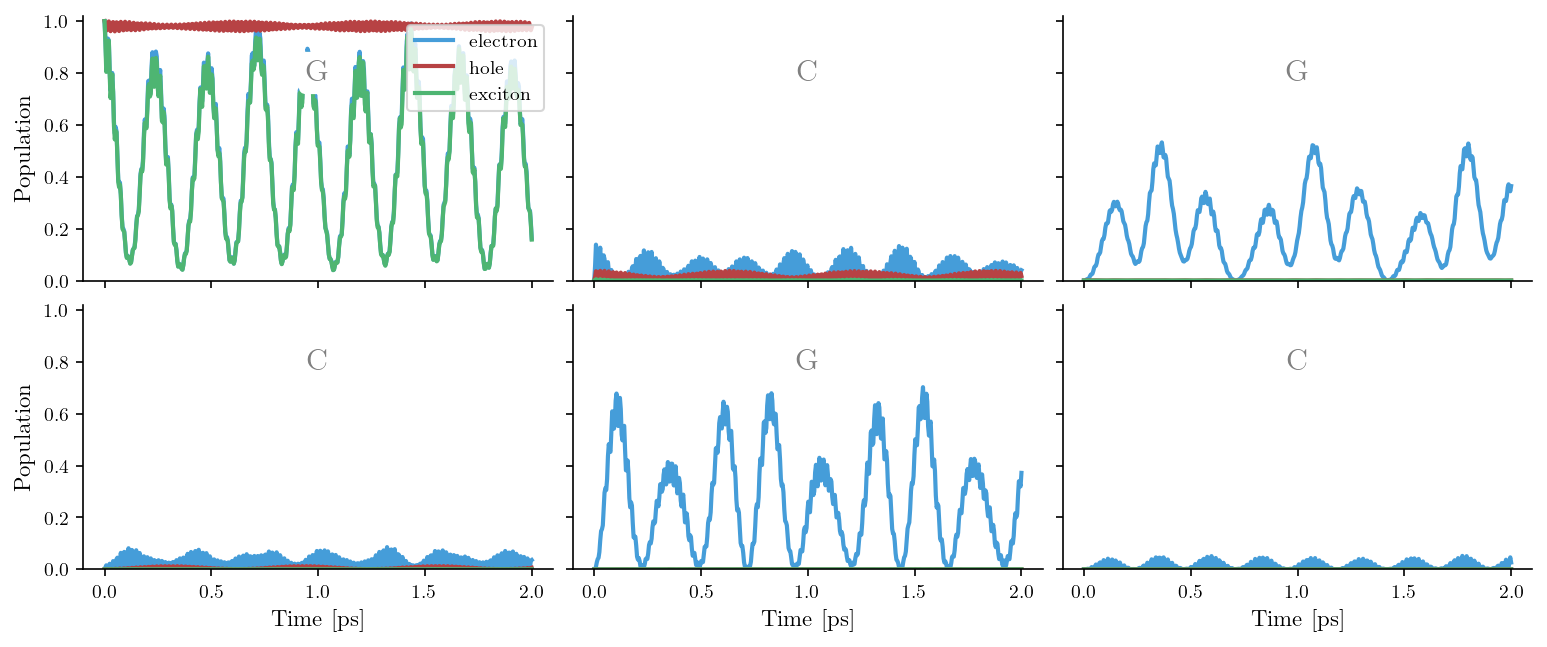

In [26]:
tb_sites = get_tb_sites('GCG')
vis = Visualization(tb_sites, source="Hawke2010", t_end=2)
fig, ax = vis.plot_pops()

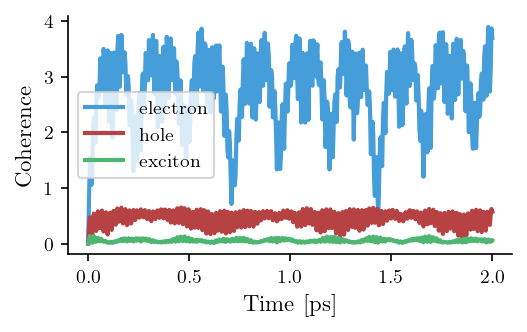

In [27]:
tb_sites = get_tb_sites('GCG')
vis = Visualization(tb_sites, source="Hawke2010", t_end=2)
fig, ax = vis.plot_coh()